In [39]:
# external libs
import numpy as np
import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt

### Read data

To run this code, you have to create a `data` folder on the same directory. Inside this data folder,
add train.csv, test.csv and DatasetPerFeature

In [7]:
train_df = pd.read_csv('data/train.csv')
test_df = pd.read_csv('data/test.csv')

In [8]:
train_df.head(5)
test_df.head(5)

,Id,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X3442,X3443,X3444,X3445,X3446,X3447,X3448,X3449,X3450,X3451
0,3,0.000000,0.000000,0.000000,0,0,0,0,0,0,...,118,184,123,134,126,143,121,123,131,83
1,4,0.000000,0.000000,0.000000,0,0,0,0,0,0,...,139,178,141,186,148,170,142,131,137,113
2,6,0.000000,0.000000,0.000000,0,0,0,0,0,0,...,116,138,87,126,116,144,107,111,114,76
3,7,0.002765,0.004827,0.004489,0,0,0,0,0,0,...,100,112,71,75,100,103,96,88,95,82
4,9,0.000000,0.000000,0.000000,0,0,0,0,0,0,...,77,127,80,95,101,121,92,114,92,56


In [10]:
train_df.columns

Index(['Id', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9',
       ...
       'X3443', 'X3444', 'X3445', 'X3446', 'X3447', 'X3448', 'X3449', 'X3450',
       'X3451', 'Class'],
      dtype='object', length=3453)

## Data Exploration

ONLY TRAIN DATASET

We will analyze the distribution of the answer and then the feature sets:
1. AutoColorCorrelogram (features X1 to X768)
1. FCTH (features X977 to X1168)
1. Gabor (features X1870 to X1929)
1. Histogram (features X1944 to X2199)
1. JPEGCoefficientHistogram (features X2368 to X2559)

## Classification analysis

<Axes: >

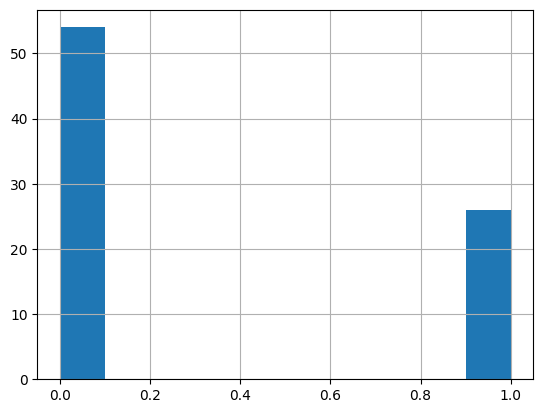

In [15]:
train_df['Class'].hist()

As expected, the number of classes is heterogenous: there are many more not meteors than meteors. 

This can pose a challenge during training and create bias. We have some options:
1. Accept it and do nothing (probably not the best option)
2. Reduce de number of classes 0
3. Create classes 1

Choose 1

### AutoColorCorrelogram (features X1 to X768)

In [16]:
cols = ["X" + str(i) for i in range(1, 769)] + ["Class"]
acc_df = train_df[cols]

In [32]:
# Filter all zero columns
not_zero_columns = acc_df.columns[~(acc_df == 0).all()]
not_zero_columns_df = acc_df[not_zero_columns]

not_zero_columns_df.describe()

,X1,X2,X3,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,Class
count,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.00000
mean,0.000474,0.000645,0.000619,0.291267,0.287257,0.285488,0.808679,0.801182,0.798167,0.024186,0.023105,0.022461,0.014323,0.013049,0.011768,0.32500
std,0.001702,0.002351,0.002245,0.431633,0.432577,0.433053,0.343609,0.354571,0.358984,0.121698,0.120589,0.120163,0.026458,0.025446,0.024426,0.47133
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.026142,0.018318,0.016335,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,0.000000,0.000000,0.000000,0.000119,0.000180,0.000153,0.860026,0.845784,0.841038,0.001171,0.000943,0.000933,0.000000,0.000000,0.000000,0.00000
50%,0.000000,0.000000,0.000000,0.014056,0.012667,0.011999,1.000000,1.000000,1.000000,0.002534,0.002133,0.001842,0.004980,0.004327,0.003340,0.00000
75%,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.005149,0.004248,0.003854,0.014898,0.013740,0.011919,1.00000
max,0.009762,0.014645,0.013801,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.153804,0.148803,0.144162,1.00000


<Axes: >

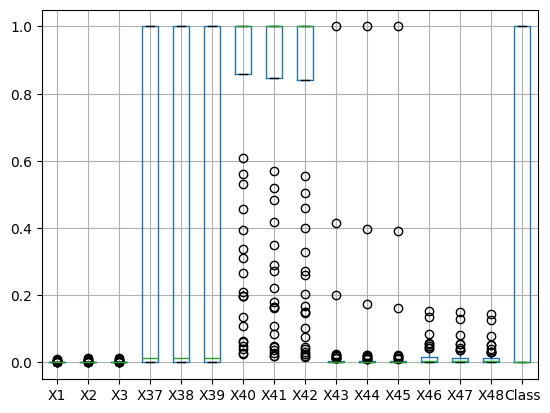

In [33]:
# Box Plot
not_zero_columns_df.boxplot()

array([[<Axes: title={'center': 'X1'}>, <Axes: title={'center': 'X2'}>,
        <Axes: title={'center': 'X3'}>, <Axes: title={'center': 'X37'}>],
       [<Axes: title={'center': 'X38'}>, <Axes: title={'center': 'X39'}>,
        <Axes: title={'center': 'X40'}>, <Axes: title={'center': 'X41'}>],
       [<Axes: title={'center': 'X42'}>, <Axes: title={'center': 'X43'}>,
        <Axes: title={'center': 'X44'}>, <Axes: title={'center': 'X45'}>],
       [<Axes: title={'center': 'X46'}>, <Axes: title={'center': 'X47'}>,
        <Axes: title={'center': 'X48'}>,
        <Axes: title={'center': 'Class'}>]], dtype=object)

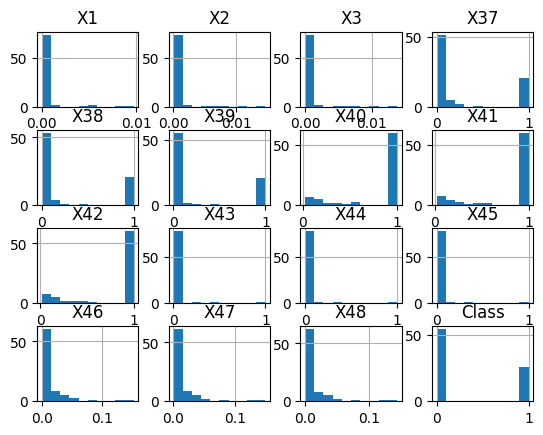

In [34]:
# Histogram
not_zero_columns_df.hist()

<Axes: >

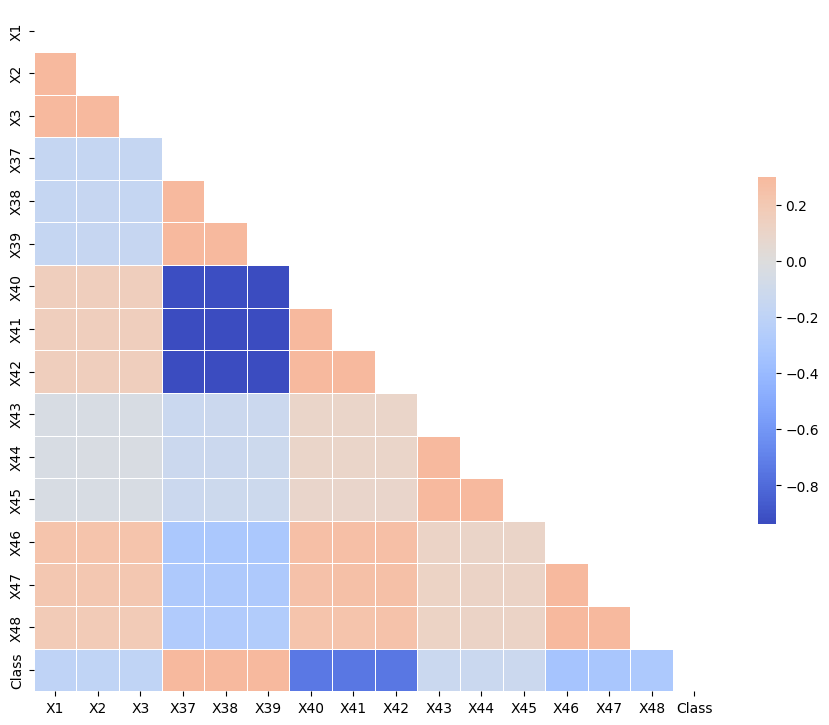

In [43]:
# Cov Matrix
corr = not_zero_columns_df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap='coolwarm',vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [44]:
sns.pairplot(not_zero_columns_df, corner=True, diag_kind='hist', 
             plot_kws={'alpha': 0.5, 's': 20, 'edgecolor': 'k'})

KeyboardInterrupt: 